#### Q1. Consider the boundary value problem:
$$
u'' = f, \quad u(0)=0, \quad u(1)=0,
$$
where
$$
f(x)=\begin{cases} 1 \quad 0.4\le x\le 0.6,\\
0 \quad \text{otherwise}.
\end{cases}
$$
- Find the exact solution of this problem.
- Solve the problem using finite difference method and check the accuracy of your solutions.

#### A1. Find the exact solution of this problem.
##### 1. Solve on Each Sub-interval
   
   Region l: $0 \le x < 0.4$
   $$
   u'' = 0 \quad \Rightarrow \quad u(x) = Ax + B
   $$
   Boundary condition $u(0) = 0$ gives $B = 0$.
   Thus
   $$
   u(x) = Ax
   $$

   Region ll: $0.4 \le x \le 0.6$
   $$
   u'' = 1 \quad \Rightarrow \quad u(x) = \frac{x^2}{2} + Cx + D
   $$

   Region ll: $0.6 < x \le 1$
   $$
   u'' = 0 \quad \Rightarrow \quad u(x) = Ex + F
   $$
   Boundary condition $u(1) = 0$ gives $F = -E$, so
   $$
   u(x) = E(x - 1)
   $$

##### 2. Continuity Conditions
   We match both $u$ and $u'$ at $x = 0.4$ and $x = 0.6$.
- At $x = 0.4$
   Left:
   $$
   u(0.4^-) = 0.4A, \quad u'(0.4^-) = A
   $$
   Right:
   $$
   u(0.4^+) = \frac{(0.4)^2}{2} + 0.4C + D, \quad u'(0.4^+) = 0.4 + C
   $$
   Matching:
   $$
   A = 0.4 + C, \\
   0.4A = 0.08 + 0.4C + D
   $$
- At $x = 0.6$
   Left:
   $$
   u(0.6^-) = \frac{(0.6)^2}{2} + 0.6C + D, \quad u'(0.6^+) = 0.6 + C
   $$
   Right:
   $$
   u(0.6^+) = -0.4E, \quad u'(0.6^+) = E
   $$
   Matching:
   $$
   E = 0.6 + C, \\
   0.18 + 0.6C + D = -0.4E
   $$

##### 3. Solve for Constants
   $$
   A = -0.1, \quad C = -0.5, \quad D = 0.08, \quad E = 0.1
   $$
   Thus
   $$
   F = -E =-0.1
   $$

#### Exact solution
$$
u(x) = \begin{cases}
-0.1x, & 0 \le x < 0.4,\\
\dfrac{x^2}{2} - \dfrac{x}{2} + 0.08, & 0.4 \le x \le 0.6,\\
0.1(x - 1), & 0.6 < x \le 1.
\end{cases}
$$

#### A2. Solve the problem using finite difference method and check the accuracy of your solutions.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x: float) -> float:
    return np.where((0.4 <= x) & (x <= 0.6), 1.0, 0.0)

def exact_u(x: float) -> float:
    x = np.asarray(x)
    u = np.zeros_like(x)

    mask1 = (0 <= x) & (x < 0.4)
    mask2 = (0.4 <= x) & (x <= 0.6)
    mask3 = (0.6 < x) & (x <= 1)

    u[mask1] = -0.1 * x[mask1]
    u[mask2] = 0.5 * x[mask2]**2 - 0.5 * x[mask2] + 0.08
    u[mask3] = 0.1 * (x[mask3] - 1)

    return u

def solve_fd(n: int):
    # Grid
    h = 1.0 / n
    x = np.linspace(0.0, 1.0, n + 1)

    # Number of interior points
    m = n - 1

    # Build tridiagonal matrix A of size m x m
    # A = tridiag(-1, 2, -1)
    A = np.diag(2 * np.ones(m)) \
    + np.diag(-1 * np.ones(m-1), 1) \
    + np.diag(-1 * np.ones(m-1), -1)

    # Build RHS: b_i = -h^2 * f(x_i),  i=1,...,n-1
    b = np.zeros(m)
    for i in range(1, n):   # interior indices
        xi = x[i]
        b[i - 1] = - (h**2) * f(xi)

    # Solve A * u_inner = b
    u_inner = np.linalg.solve(A, b)

    # Add boundary values u_0 = 0, u_n = 0
    u = np.zeros(n + 1)
    u[1:n] = u_inner

    return x, u

def compute_error(n):
    x, u = solve_fd(n)
    u_ex = exact_u(x)
    err = np.max(np.abs(u - u_ex))
    h = 1.0 / n
    return err, h, x, u, u_ex

     n         h  max_error  order_p
0   20  0.050000   0.002000      NaN
1   40  0.025000   0.001000      1.0
2   80  0.012500   0.000500      1.0
3  160  0.006250   0.000250      1.0
4  320  0.003125   0.000125      1.0


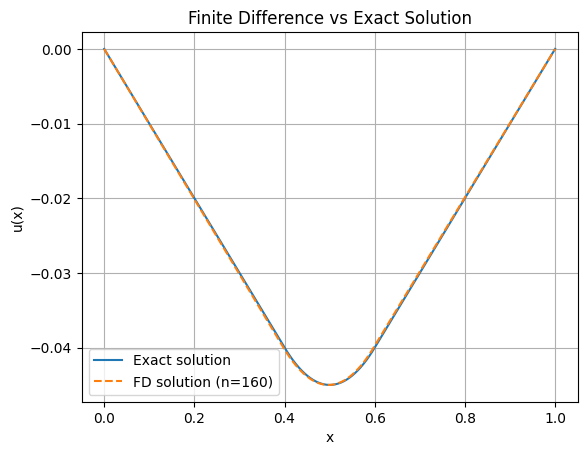

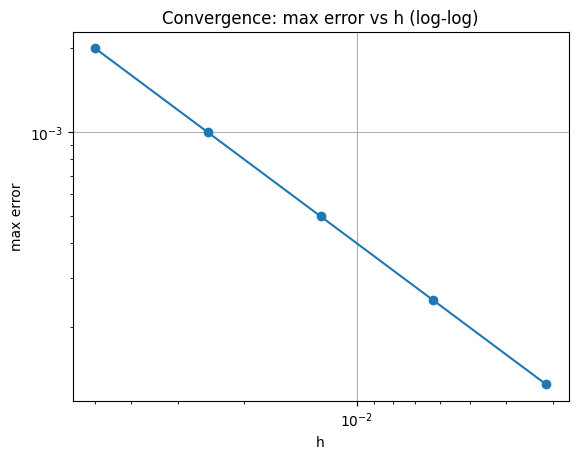

In [17]:
n_values = [20, 40, 80, 160, 320]

rows = []
prev_err = None
hs_list = []
errs_list = []

for n in n_values:
    err, h, x, u, u_ex = compute_error(n)

    # for table
    if prev_err is None:
        p = np.nan   # 第一個沒有階數
    else:
        p = np.log(prev_err / err) / np.log(2.0)

    rows.append([n, h, err, p])
    prev_err = err

    # for convergence plot
    hs_list.append(h)
    errs_list.append(err)

df = pd.DataFrame(rows, columns=["n", "h", "max_error", "order_p"])
print(df)

# ----- plot FD vs exact solution -----
n_plot = 160
_, _, x_plot, u_plot, u_ex_plot = compute_error(n_plot)

plt.figure()
plt.plot(x_plot, u_ex_plot, label="Exact solution")
plt.plot(x_plot, u_plot, "--", label=f"FD solution (n={n_plot})")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Finite Difference vs Exact Solution")
plt.legend()
plt.grid(True)

# ----- plot log-log error vs h -----
plt.figure()
plt.loglog(hs_list, errs_list, marker="o")
plt.gca().invert_xaxis()  # h 由大到小，往右變細
plt.xlabel("h")
plt.ylabel("max error")
plt.title("Convergence: max error vs h (log-log)")
plt.grid(True)

plt.show()

#### Q2. Consider the boundary value problem:
$$
u'' - 2u' + u = 1, \quad u(0)=0, \quad u'(1)=1.
$$
- Show that the solution is unique by considering the homogeneous problem.
- Develop a 2nd-order finite difference method.
- Solve the problem and check the accuracy of your solutions.

#### A2. Show that the solution is unique by considering the homogeneous problem.
To show that the solution is unique, it suffices to show that the homogeneous problem has only the trivial solution.
$$
u'' - 2u' + u = 0, \quad u(0)=0, \quad u'(1)=0.
$$
If we can show that this problem has only $u(x)≡0$, then the original nonhomogeneous BVP must have at most one solution.

-------------

We look for solutions of the form
$$
u(x) = e^{rx}
$$
, where r is a constant to be determined. Then
$$
u'(x) = re^{rx}, \quad u''(x) = r^2e^{rx}
$$
Substituting these into homogeneous equation
$$
r^2e^{rx} - 2re^{rx} + e^{rx} = 0
$$
